## **HW4 Principal Component Analysis**

# 1. Introduction
Congratulations on reaching the final assignment! In this assignment, you will learn how to use Principal Components Analysis (PCA) to reduce the dimensionality of high-dimensional data. Additionally, you will compare various differences between the original high-dimensional data and the transformed data obtained through PCA.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#! pip install import_ipynb

In [1]:
'''
You are not allowed to import other packages

If you cannot import the following ipynb file, Please run the ipynb file first and then restart the HW4.ipynb.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import math
from tqdm import tqdm
import time

import import_ipynb
from PCA import MY_PCA, MY_SparsePCA
from Model import *
from Loss import *
from Utils import *
from Data_preprocess import *
from Trainer import *
from Config import *

importing Jupyter notebook from PCA.ipynb
importing Jupyter notebook from Data_preprocess.ipynb
importing Jupyter notebook from Model.ipynb
importing Jupyter notebook from Loss.ipynb
importing Jupyter notebook from Utils.ipynb
importing Jupyter notebook from Trainer.ipynb
importing Jupyter notebook from Config.ipynb


## Model & Data preprocess

As mentioned in Assignment 3, this assignment is closely related to it. Please follow the data preprocessing and model implementation steps from Assignment 3. Note that there are additional constraints on the layer stacking in the model implementation this time. Be sure to follow the prompts for designing the model accordingly.

This time, we'll organize different functionalities into separate files for better code readability. For the model and data preprocessing, please implement them in the following files: Loss.ipynb, Model.ipynb, and Data_preprocess.ipynb.

LOAD DATASET ... 
Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


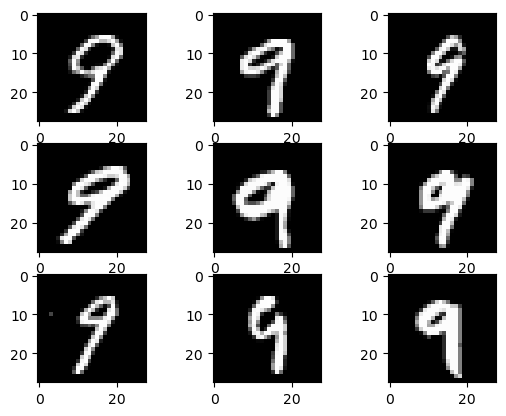

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)

DATA PREPROCESSING ... 
shape of x_train: (24852, 784)
shape of y_train: (24852, 10)
training data - percentage [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
shape of x_val: (6213, 784)
shape of y_val: (6213, 10)
validation data - percentage [0.18, 0.19, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.04, 0.02]


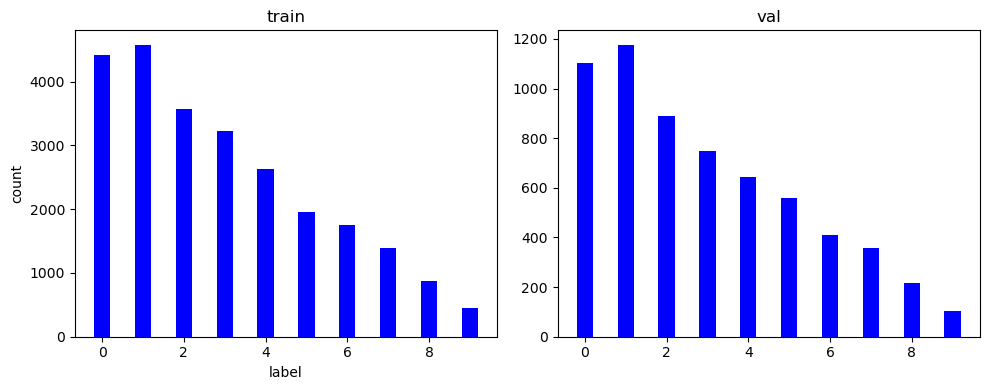

In [2]:
print("LOAD DATASET ... ")
X_train, Y_train, X_test = load_data('basic_data.npz')

print()
print("DATA PREPROCESSING ... ")
x_train, y_train, x_val, y_val = data_preprocess(X_train, Y_train)

# 2. Basic Part

## PCA Implement
In this section, you are required to implement PCA by completing the following steps in the PCA.ipynb file.
>* Step1. Centering --> in HW4.ipynb
>* Step2. Covariance matrix computation --> in PCA.ipynb
>* Step3. Eigenvectors and eigenvalues computation --> in PCA.ipynb
>* Step4. Projection --> in PCA.ipynb

After implementing PCA, you need to reduce the data to two dimensions, observe the two-dimensional scatter plot of the data, and include it in the report.

In [3]:
def centralization(x):
    return x - np.mean(x, axis=0)

In [4]:
# GRADED CODE: Implement centering function. (5%)
### START CODE HERE ###
'''
PCA Step1
HINT: It is important to choose the appropriate mean for data centralization..

x_train_cent -> Centeralized training data
x_val_cent -> Centeralized validation data
x_test_cent -> Centeralized testing data
'''
x_train_cent = centralization(x_train)
x_val_cent = centralization(x_val)
X_test_cent = centralization(X_test)

print(x_train_cent.shape, x_val_cent.shape, X_test_cent.shape)
### END CODE HERE ###

(24852, 784) (6213, 784) (7767, 784)


Computing Covariance
(784, 784)
Computing EigenVector & Value
Compute data_pca
DONE

Visualizing


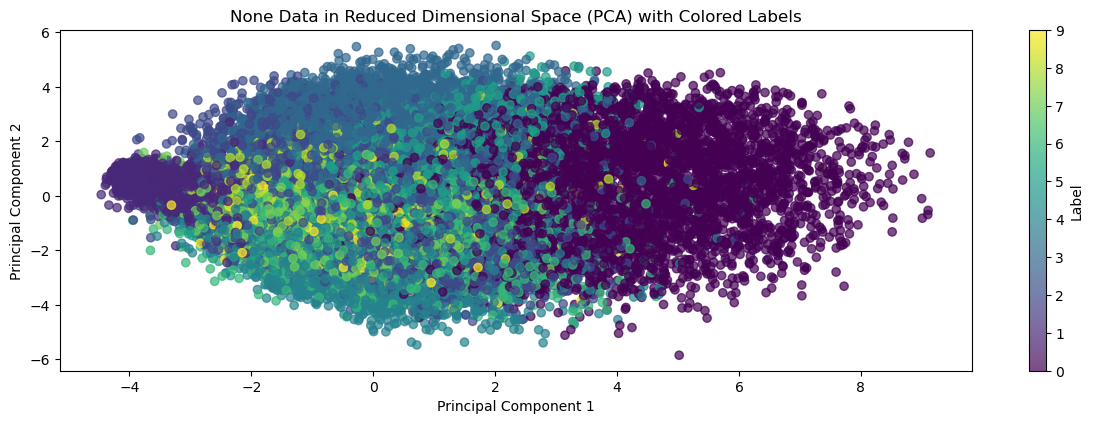

In [5]:
# GRADED CODE:
# Reduce the dimensions to two and generate scatter plots.
# (Training dataset  5%, Validation dataset 5%)

### START CODE HERE ###
'''
x_train_pca -> PCA of training data
x_val_pca -> PCA of validation data
x_test_pca -> PCA of testing data
Please use pca.function(data) to generate PCA of these datasets

Parameters:
MY_PCA:
n_components = Number of components to do the transformation.

pca.PCA_visualization:
data_pca -> The dataset you want to visuallize.
label -> The coresponding labels of the data_pca
text -> True if you want to plot the number on the scater plot.
tag -> You can set different tag for different figure
'''

pca = MY_PCA(n_components=2)

x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(X_test)

print("Visualizing")
pca.PCA_visualization(data_pca=x_train_pca, label=y_train, text=False, n_components=2, tag=None)
### END CODE HERE ###

In [6]:
print(x_train_pca.shape)
print(x_train.shape)

(24852, 2)
(24852, 784)


The example PCA visuallization of IRIS Datasets.

![figure](./iris_pca.png "IRIS PCA dataset")

In [7]:
# For grading, Please put the basic_cov into your output.npy.
basic_cov = pca.covariance_matrix
print('covariance_matrix: ', (basic_cov[100][12:16]*10000).round(3))
#The reason for multiplying by 10,000 here is that the original values are too small and difficult to observe
print(f'x_train_pca:', x_train_pca[0].round(3))
print('x_val_pca: ',x_val_pca[0].round(3))

covariance_matrix:  [0.015 0.322 0.322 0.013]
x_train_pca: [0.707 3.321]
x_val_pca:  [-2.295 -2.88 ]


**Expected Output**
$$ covariance\_matrix:\  [0.015\ \  0.322\ \ 0.322\ \ 0.013]$$
$$ x\_train\_pca:\ [0.707\ \ 3.321]$$
$$ x\_val\_pca:\ [-2.295\  -2.88]$$
$$or$$
$$ x\_train\_pca:\ [-0.707\ \ -3.321]$$
$$ x\_val\_pca:\ [2.295\  2.88]$$

In [8]:
# GRADED CODE: TRAINING MODEL WITH PCA DATA (PCA for Training, Validation and Test Dataset)
### START CODE HERE ###
'''
n_components -> Number fo components of PCA, and it will be the input dimension of your basic model.
pca -> Define your MY_PCA class here.

x_train_pca -> PCA of training data
x_val_pca -> PCA of validation data
x_test_pca -> PCA of testing data
Please use pca.xxx(data) to generate PCA of these datasets
'''

n_components = 250
pca = MY_PCA(n_components=n_components)

x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(X_test)

#print("Visualizing")
#pca.PCA_visualization(data_pca=x_train_pca, label=y_train, text=False, n_components=3, tag=None)
### END CODE HERE ###

print(x_train_pca.shape, x_val_pca.shape, x_test_pca.shape)

Computing Covariance
(784, 784)
Computing EigenVector & Value
Compute data_pca
DONE

(24852, 250) (6213, 250) (7767, 250)


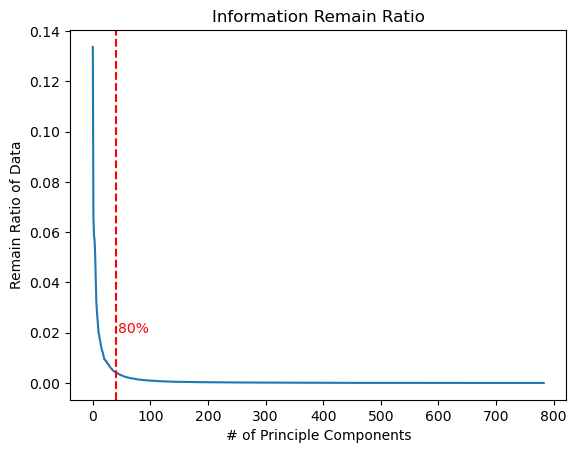

In [9]:
# GRADED CODE: PCA INFORMATION REMAIN RATIO PLOT
# Calculate the minimum number of principal components to cover 80% variance (5%)
### START CODE HERE ###
'''
num_PC -> Minimum number of principal components to cover 80% variance
var_ratio -> The variance ratio of each component
'''

num_PC, var_ratio = pca.components_remain_ratio(0.80)
### END CODE HERE###


plt.plot(var_ratio)
plt.axvline(x=num_PC, color='r', linestyle='--')

plt.text(x=num_PC+3, y=0.02, s='80%', color='r')
plt.title('Information Remain Ratio')
plt.xlabel('# of Principle Components')
plt.ylabel('Remain Ratio of Data')
plt.savefig('Infotmation Remaining Ratio.png')
plt.show()
plt.close()

## Reconstruct  Data & Eigenvectors Visuallization

In [14]:
# GRADED CODE:
# Reconstruct image by using K components and compare with the original image (Training data 5%, Validation data 5%)
# Visuallize at least one eigenvector
# For grading, please put the reconstruct_data_train and the reconstruct_data_val in output.npy
reconstruct_data_train, z_train = pca.reconstructData(x_train[0], np.mean(x_train, axis=0), k=4)
reconstruct_data_val, z_val = pca.reconstructData(x_val[0], np.mean(x_train, axis=0), k=4)

### START CODE HERE ###
'''
reconstruct_img -> The reconstruct image of x_train[0].
eigenvector_img -> The image of eigenvector
'''

reconstruct_img = reconstruct_data_train.reshape(28, 28)
eigenvector_img = pca.eigen_vec[:, 0].reshape(28, 28)

### END CODE HERE ###
plt.imshow(reconstruct_img, cmap='binary')
plt.savefig('reconstruct_img.png')

plt.imshow(eigenvector_img, cmap='binary')
plt.savefig('eigenvector_img.png')
### Please put the reconstruct img in your report

plt.close()

train_squared_reconstruct_error = np.sum(x_train[0] - reconstruct_data_train)**2/reconstruct_data_train.shape[0]
val_squared_reconstruct_error = np.sum(x_val[0] - reconstruct_data_val)**2/reconstruct_data_val.shape[0]

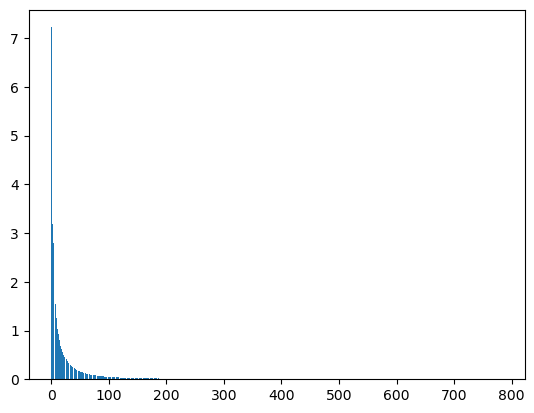

In [20]:
#Visualize eigenval
eigval_data = pca.eigen_val
plt.bar(np.arange(len(eigval_data)), eigval_data)
plt.show()

In [13]:
print('k principle components:', num_PC)
print('Train Squared Reconstruct Error: ', train_squared_reconstruct_error.round(3))
print('Validation Squared Reconstruct Error: ',val_squared_reconstruct_error.round(3))
print('z: ', ['%.3f' %(z) for z in z_train])

k principle components: 40
Train Squared Reconstruct Error:  0.043
Validation Squared Reconstruct Error:  0.077
z:  ['0.707', '3.321', '0.928', '0.603']


**Expected output:**

$$ k\ principle\ components:  40 $$
$$ Train\ Squared\ Recontstruct\ Error:  0.043 $$
$$ Validation\ Squared\ Reconstruct\ Error:  0.077 $$
$$ z:  [0.707, 3.321, 0.928, 0.603] $$
$$or$$
$$ z:  [-0.707, -3.321, 0.928, -0.603] $$

### Model
In this part, you need to train your model with low-dimensional data (after PCA) and original data, respectively. Compare the difference between them.

Loss after iteration 0: 15.438854
Loss after iteration 10: 2.592921
Loss after iteration 20: 1.855092
Loss after iteration 30: 1.437226
Loss after iteration 40: 1.160773
Loss after iteration 50: 0.951022
Loss after iteration 60: 0.802564
Loss after iteration 70: 0.685965
Loss after iteration 80: 0.594109
Loss after iteration 90: 0.521875


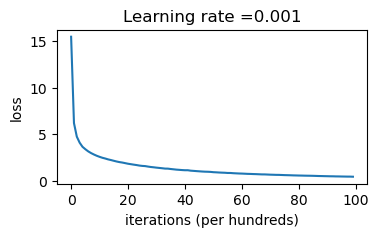

In [14]:
config = Config([x_train.shape[1], 128, 10], 'focal_loss')

#CODE: TRAINING MODEL WITHOUT PCA DATA (MODEL SETTING AND TRAINING)

# Call Model.ipynb with config to define 'model'
# Use Trainer.ipynb to train your model.
### START CODE HERE ###

model = Model(config)
trainer(model, config, x_train, y_train)
### END CODE HERE ###

In [15]:
pred_train = predict(x_train, y_train, model)

Accuracy: 96.97%
f1 score for each class: [0.96075206 0.98260773 0.96963706 0.97271318 0.98528302 0.95972325
 0.96774194 0.97268908 0.92388451 0.95493562]
f1_macro score: 0.96


In [16]:
pred_val = predict(x_val, y_val, model)

Accuracy: 94.22%
f1 score for each class: [0.94881517 0.97622136 0.9471891  0.94410774 0.95598456 0.90846287
 0.93473193 0.92080537 0.87265136 0.81981982]
f1_macro score: 0.92


Computing Covariance
(784, 784)
Computing EigenVector & Value
Compute data_pca
DONE

Loss after iteration 0: 17.526265
Loss after iteration 10: 2.459862
Loss after iteration 20: 1.625127
Loss after iteration 30: 1.214253
Loss after iteration 40: 0.961862
Loss after iteration 50: 0.785638
Loss after iteration 60: 0.660498
Loss after iteration 70: 0.567214
Loss after iteration 80: 0.489653
Loss after iteration 90: 0.429883


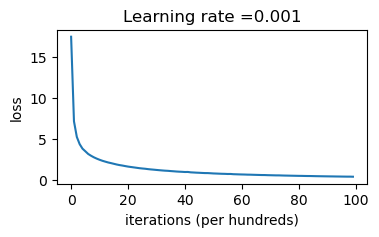

In [17]:
n_components = 250
config = Config([n_components, 128, 10], 'focal_loss')

# GRADED CODE: TRAINING MODEL WITH PCA DATA (MODEL SETTING AND TRAINING)
# Use PCA and the model from HW3 (advanced part) to train models on the imbalance MNIST dataset. (10%)

# Call Model.ipynb with config to define 'model'
# Use Trainer.ipynb to train your model.
### START CODE HERE ###
model = Model(config)
pca = MY_PCA(n_components=n_components)

x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(X_test)

trainer(model, config, x_train_pca, y_train)
### END CODE HERE ###

In [18]:
pred_train = predict(x_train_pca, y_train, model)

Accuracy: 97.38%
f1 score for each class: [0.96716139 0.98328722 0.97146071 0.97585887 0.98696391 0.9684001
 0.97209821 0.97710461 0.93916756 0.95905172]
f1_macro score: 0.97


In [19]:
pred_val = predict(x_val_pca, y_val, model)

Accuracy: 94.95%
f1 score for each class: [0.95913574 0.97973264 0.9543662  0.95013477 0.95332823 0.92388451
 0.93317702 0.92991914 0.90153173 0.82949309]
f1_macro score: 0.93


In [20]:
pred_test = predict(x_test_pca, None, model)
outputs = {}

### for grading
outputs["basic_pred_test"] = pred_test
outputs["basic_layers_dims"] = config.layers_dims
outputs["basic_activation_fn"] = config.activation_fn
outputs["basic_loss_function"] = config.loss_function
outputs["basic_alpha"] = config.alpha
outputs["basic_gamma"] = config.gamma
outputs["basic_reconstruct_data_train"] = reconstruct_data_train
outputs["basic_reconstruct_data_val"] = reconstruct_data_val
outputs["basic_covariance_matrix"] = basic_cov
outputs["basic_var_ratio"] = var_ratio
basic_model_parameters = []
for basic_linear in model.linear:
    basic_model_parameters.append(basic_linear.parameters)
outputs["basic_model_parameters"] = basic_model_parameters

# 3. Advanced Part

In the advanced section, you will learn how to implement non-linear PCA, Sparse PCA.
Please complete the PCA.ipynb file for this purpose.

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


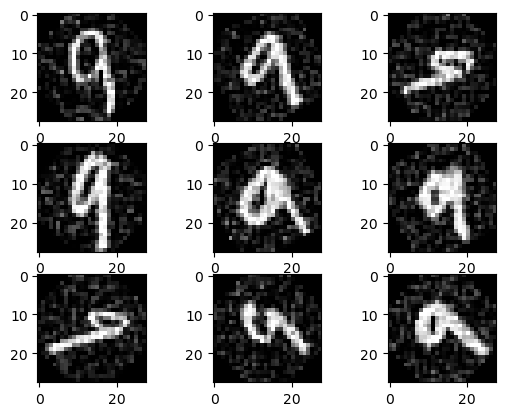

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)
shape of x_train: (24852, 784)
shape of y_train: (24852, 10)
training data - percentage [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
shape of x_val: (6213, 784)
shape of y_val: (6213, 10)
validation data - percentage [0.18, 0.19, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.04, 0.02]


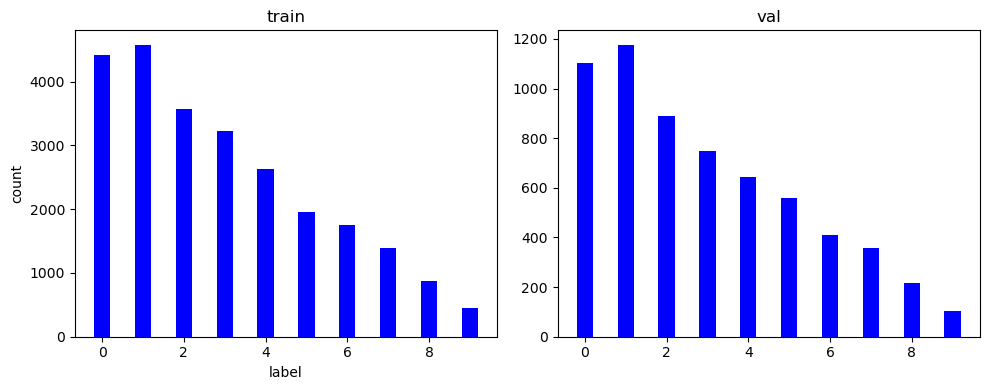

In [21]:
X_noise_train, Y_noise_train, X_noise_test = load_data('advanced_data.npz')
x_noise_train, y_noise_train, x_noise_val, y_noise_val = data_preprocess(X_noise_train, Y_noise_train)

In [22]:
# GRADED CODE: DATA CENTRALIZATION
### START CODE HERE ###
'''
param = 
x_noise_train, x_noise_val, X_noise_test

x_noise_train_cent -> Centeralized training data
x_noise_val_cent -> Centeralized validation data
x_noise_test_cent -> Centeralized testing data
'''

def centralization2(x):
    return x - np.mean(x, axis=0)
    
x_noise_train_cent = centralization2(x_noise_train)
x_noise_val_cent = centralization2(x_noise_val)
X_noise_test_cent = centralization2(X_noise_test)
### END CODE HERE ###

### NOT FOR TESTING PART (SELF CHECK)

Loss after iteration 0: 24.343021
Loss after iteration 10: 6.487361
Loss after iteration 20: 4.559135
Loss after iteration 30: 3.425537
Loss after iteration 40: 2.703991
Loss after iteration 50: 2.192105
Loss after iteration 60: 1.823180
Loss after iteration 70: 1.538112
Loss after iteration 80: 1.339617
Loss after iteration 90: 1.151197


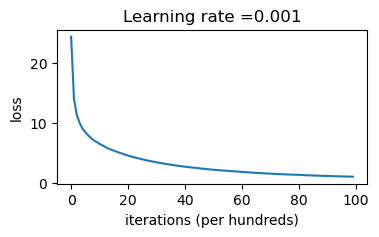

Accuracy: 93.06%
f1 score for each class: [0.88880532 0.97701277 0.92034892 0.93420852 0.96329588 0.8966009
 0.92103869 0.9270415  0.91993721 0.93110647]
f1_macro score: 0.93
Accuracy: 87.61%
f1 score for each class: [0.88241206 0.96810345 0.87297921 0.86967911 0.88804265 0.82342657
 0.84042553 0.84046693 0.77559913 0.6173913 ]
f1_macro score: 0.84


In [23]:
# YOU CAN DO PCA HERE TO COMPARE THE PERFORMANCE WITH SPARCEPCA (NOT FOR GRADING)

# Dataset = x_noise_train, y_noise_train, x_noise_val, y_noise_val
# Test = X_noise_test

#TRAIN WITH ORIGINAL DATA
config = Config([x_noise_train.shape[1], 64, 10], 'focal_loss')
model = Model(config)
trainer(model, config, x_noise_train, y_noise_train)
pred_train = predict(x_noise_train, y_noise_train, model)
pred_val = predict(x_noise_val, y_noise_val, model)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:33<00:00,  3.65it/s]


Loss after iteration 0: 29.271738
Loss after iteration 10: 6.749125
Loss after iteration 20: 4.794634
Loss after iteration 30: 3.764427
Loss after iteration 40: 3.099109
Loss after iteration 50: 2.617926
Loss after iteration 60: 2.262331
Loss after iteration 70: 1.973549
Loss after iteration 80: 1.758315
Loss after iteration 90: 1.558959


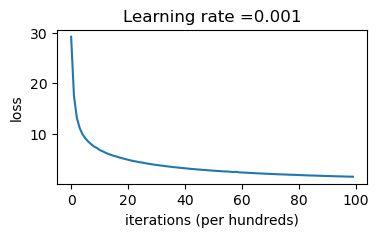

Accuracy: 91.67%
f1 score for each class: [0.88883312 0.96844932 0.90396297 0.92173642 0.93704465 0.88696871
 0.91106406 0.91059056 0.86676573 0.89112903]
f1_macro score: 0.91
Accuracy: 87.09%
f1 score for each class: [0.88411588 0.95895197 0.86666667 0.8727515  0.86631815 0.82504288
 0.84522503 0.83787289 0.76       0.61864407]
f1_macro score: 0.83


In [24]:
#TRAIN WITH PCA DATA
n_components = 500
config = Config([n_components, 64, 10], 'focal_loss')

model = Model(config)
sparse_pca = MY_SparsePCA(n_components, 0.001, 1000)

sparse_pca.fit(x_noise_train_cent)
x_train_spca = sparse_pca.transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)

trainer(model, config, x_train_spca, y_noise_train)
pred_train = predict(x_train_spca, y_noise_train, model)
pred_val = predict(x_val_spca, y_noise_val, model)


### END CODE HERE ###

### SparsePCA

In [25]:
n_components = 2
sparse_pca = MY_SparsePCA(n_components, 0.001, 1000)

# GRADED CODE: SPARSE PCA IMPLEMENT
### START CODE HERE ###
'''
x_train_spca -> Sparse PCA of training data
x_val_spca -> Sparse PCA of validation data
x_test_spca -> Sparse PCA of testing data
'''
sparse_pca.fit(x_noise_train_cent)

x_train_spca = sparse_pca.transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)
### END CODE HERE ###

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.52it/s]


In [26]:
### For grading please put sparse_pca_check and sparse_Vt in output.npy
sparse_pca_check = x_train_spca
sparse_Vt = sparse_pca.Vt[0][0]

print('Sparse_pca init Vt: ', sparse_Vt)
print('x_train_spca: ', sparse_pca_check[0].round(3))

Sparse_pca init Vt:  1.74160427879828e-20
x_train_spca:  [-0.229 -0.762]


**Expected Output**
$$ Sparse\_pca\ init\ Vt:\ 1.74160428e^{-20} $$
$$ x\_train\_spca:\ [-0.229\ \ -0.762]$$

## Sparse PCA imple

In [27]:
# GRADED CODE: SPARSE PCA IMPLEMENT
### START CODE HERE ###
'''
n_components -> Number of components fo Sparse PCA, and it will be the input dimension of your basic model.
sparse_pca -> Please use
x_train_spca -> Sparse PCA of training data
x_val_spca -> Sparse PCA of validation data
x_test_spca -> Sparse PCA of testing data
'''
n_components = 500
sparse_pca = MY_SparsePCA(n_components, 0.001, 1000)
sparse_pca.fit(x_noise_train_cent)

x_train_spca = sparse_pca.transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)
### END CODE HERE ###

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:29<00:00,  3.71it/s]


## Model

Loss after iteration 0: 28.004224
Loss after iteration 10: 6.390879
Loss after iteration 20: 4.368772
Loss after iteration 30: 3.304559
Loss after iteration 40: 2.629301
Loss after iteration 50: 2.152905
Loss after iteration 60: 1.807778
Loss after iteration 70: 1.542848
Loss after iteration 80: 1.331002
Loss after iteration 90: 1.162818


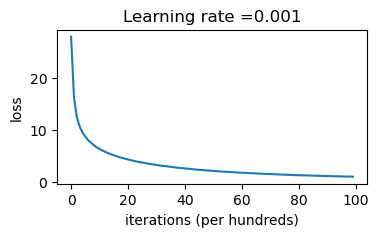

In [28]:
config = Config([n_components, 128, 10], 'focal_loss')

# GRADED CODE: SPARSE PCA IMPLEMENT
# Please call Model.ipynb and Trainer.ipynb to define and train your model.
### START CODE HERE ###

model = Model(config)
trainer(model, config, x_train_spca, y_noise_train)

### END CODE HERE ###

In [29]:
sparse_pred_train = predict(x_train_spca, y_noise_train, model)

Accuracy: 93.25%
f1 score for each class: [0.90271409 0.97176654 0.91792965 0.94066615 0.95558044 0.91141639
 0.92619238 0.92792491 0.8988764  0.93796004]
f1_macro score: 0.93


In [30]:
sparse_pred_val = predict(x_val_spca, y_noise_val, model)

Accuracy: 88.30%
f1 score for each class: [0.89416419 0.96721311 0.87557604 0.88270378 0.88204358 0.8366465
 0.85209713 0.84856397 0.77489177 0.67579909]
f1_macro score: 0.85


In [31]:
sparse_pred_test = predict(x_test_spca, None, model)

### Advanced Ranking
In the advanced ranking section, you are allowed to integrate PCA with additional data preprocessing. However, please note that you are not permitted to use existing data preprocessing and PCA libraries, modify the model's architecture, or alter the predetermined configuration.

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


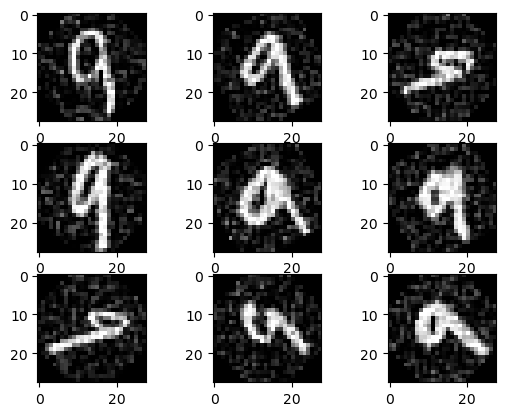

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)


In [32]:
# GRADED CODE: RANKING PART DO YOUR DATA PREPROCESS HERE (10%)
## input_dim comment ex. number of  principle components or image dim
## loss function = 'focal loss' or 'crossentropy'
### START CODE HERE ###
'''
input_dim -> The first input dimension of your model
eg. It could be the number of principle comopnents or original data dimension. Its depends on your data preprocess

loss_function -> You can choose the loss function from HW3. (eg. 'focal_loss')
'''
input_dim = 784
loss_function = 'focal_loss'

X_noise_train, Y_noise_train, X_noise_test = load_data('advanced_data.npz')
#x_noise_train, y_noise_train, x_noise_val, y_noise_val = data_preprocess(X_noise_train, Y_noise_train)

In [33]:
def median_blur(x):
    ret = np.zeros((28, 28))
    img = np.reshape(x, (28, 28))
    
    for i in range(1, 27):
        for j in range(1, 27):
            ret[i][j] = np.median(img[i-1:i+2, j-1:j+2])
            
    return ret

def image_transition(img):
    dX = np.random.randint(-2, 3)
    dY = np.random.randint(-2, 3)
    
    ret = np.roll(img, dX, axis=0)
    ret = np.roll(ret, dY, axis=1)
    
    return ret

In [34]:
x_dataset = []
x_test_dataset = []

for i, row in enumerate(X_noise_train):
    print("Iteration {}/31065".format(i), "\r", end="")
    x_dataset.append(median_blur(row))

for i, row in enumerate(X_noise_test):
    print("Iteration {}/7767".format(i), "\r", end="")
    x_test_dataset.append(median_blur(row))

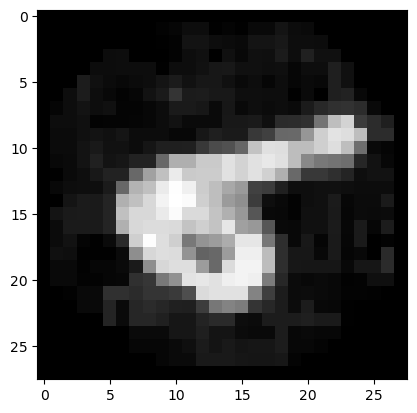

In [35]:
plt.imshow(x_test_dataset[334], cmap='gray')
plt.show()

In [36]:
x_dataset = np.array(x_dataset)
print(x_dataset.shape)

(31065, 28, 28)


In [37]:
my_it = [2, 2, 2, 3, 3, 4, 5, 6, 8, 15]
aaa = [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
my_it = np.array(my_it)
aaa = np.array(aaa)
print(my_it * aaa)

[0.36 0.36 0.28 0.39 0.33 0.32 0.35 0.36 0.32 0.3 ]


In [38]:
label = np.argmax(Y_noise_train, axis=1)
print(label)

[9 9 9 ... 0 0 0]


In [39]:
n_data = len(X_noise_train)

new_data = []
y_new_data = []
for i in range(n_data):
    print("Iteration {}/31065".format(i), "\r", end="")
    iterator = my_it[label[i]]
    for j in range(iterator):
        new_data.append(image_transition(x_dataset[i]))
        y_new_data.append(Y_noise_train[i])

In [40]:
new_data = np.array(new_data)
y_new_data = np.array(y_new_data)
print(new_data.shape)

(101631, 28, 28)


In [41]:
x_dataset = np.vstack((x_dataset, new_data))
Y_noise_train = np.vstack((Y_noise_train, y_new_data))

In [42]:
print(x_dataset.shape)

(132696, 28, 28)


In [74]:
print(len(x_dataset))
'''
a = x_dataset[432]
a = np.reshape(a, (28, 28))
plt.imshow(a, cmap='gray')
plt.show()
'''

132696


"\na = x_dataset[432]\na = np.reshape(a, (28, 28))\nplt.imshow(a, cmap='gray')\nplt.show()\n"

In [44]:
def image_thresehold(img):
    threshold = 0.3
    ret = np.where(img > threshold, 1, 0)
    return ret

x_dataset = [image_thresehold(i) for i in x_dataset]

(132696, 28, 28)


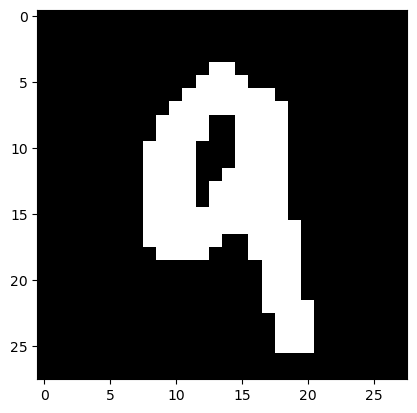

In [45]:
x_dataset = np.array(x_dataset)
print(x_dataset.shape)
plt.imshow(x_dataset[432]
           )
plt.show()

In [46]:
print(x_dataset.shape)
x_dataset = np.array([np.reshape(i, 784) for i in x_dataset])
print(x_dataset.shape)

(132696, 28, 28)
(132696, 784)


In [47]:
x_test_dataset = [image_thresehold(i) for i in x_test_dataset]
x_test_dataset = np.array(x_test_dataset)
print(x_test_dataset.shape)
x_test_dataset = np.array([np.reshape(i, 784) for i in x_test_dataset])
print(x_test_dataset.shape)

(7767, 28, 28)
(7767, 784)


(132696, 10) (132696, 784)
(7767, 784)


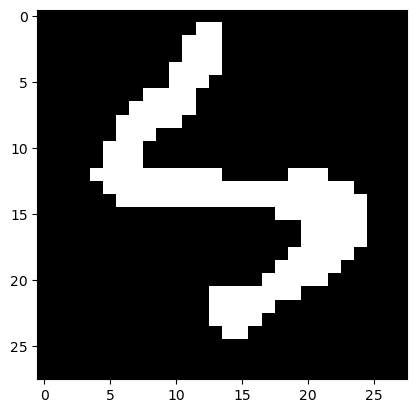

In [77]:
print(Y_noise_train.shape, x_dataset.shape)
print(x_test_dataset.shape)
a = np.reshape(x_test_dataset[732], (28, 28))
plt.imshow(a, cmap='gray')
plt.show()

shape of x_train: (106156, 784)
shape of y_train: (106156, 10)
training data - percentage [0.13, 0.13, 0.1, 0.12, 0.1, 0.09, 0.1, 0.09, 0.07, 0.07]
shape of x_val: (26540, 784)
shape of y_val: (26540, 10)
validation data - percentage [0.12, 0.13, 0.1, 0.12, 0.1, 0.09, 0.1, 0.09, 0.08, 0.07]


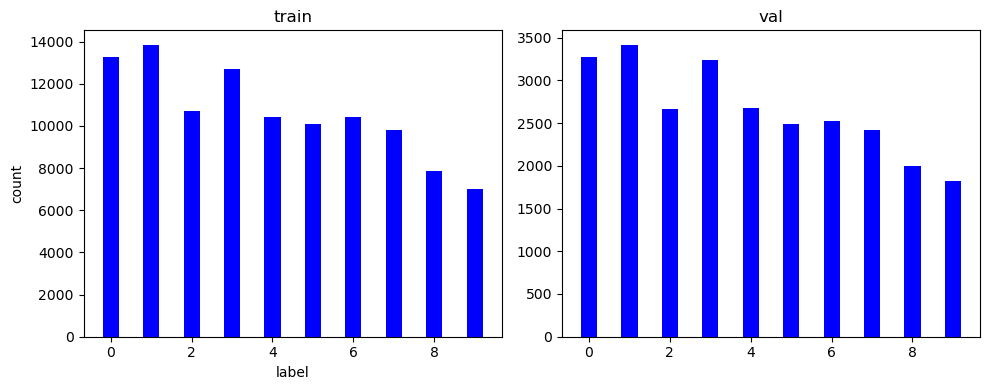

Loss after iteration 0: 24.195120
Loss after iteration 10: 3.911605
Loss after iteration 20: 2.213776
Loss after iteration 30: 1.463633
Loss after iteration 40: 1.050917
Loss after iteration 50: 0.787193
Loss after iteration 60: 0.620400
Loss after iteration 70: 0.498594
Loss after iteration 80: 0.411811
Loss after iteration 90: 0.347004


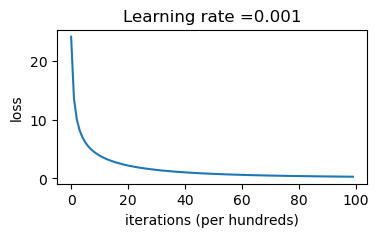

Accuracy: 97.42%
f1 score for each class: [0.93941087 0.97868901 0.96136534 0.98156809 0.98898595 0.983274
 0.97925975 0.98091145 0.96710446 0.98959587]
f1_macro score: 0.98
Accuracy: 92.07%
f1 score for each class: [0.92649684 0.96564034 0.90039992 0.91771269 0.91683797 0.90490254
 0.93292213 0.92673108 0.88036662 0.91112294]
f1_macro score: 0.92


In [61]:
adv_config = Config([784, 400, 10], loss_function)
adv_model = Model(adv_config)

# GRADED CODE: RANKING PART DO YOUR TRAINING WORK HERE
# Please call Trainer.ipynb to train the adv_model.
### START CODE HERE ###

'''
PARAMETER = x_dataset // x_test_dataset // Y_noise_train
HELPER FUNCTION = 
x_noise_train, y_noise_train, x_noise_val, y_noise_val = data_preprocess(X_noise_train, Y_noise_train)
'''

x_noise_train, y_noise_train, x_noise_val, y_noise_val = data_preprocess(x_dataset, Y_noise_train)

trainer(adv_model, adv_config, x_noise_train, y_noise_train)
pred_train = predict(x_noise_train, y_noise_train, adv_model)
pred_val = predict(x_noise_val, y_noise_val, adv_model)

None
adv_pred_test = predict(x_test_dataset, None, adv_model)
### END CODE HERE ###

In [62]:
# for grading
outputs["sparse_Vt"] = sparse_Vt
outputs["sparse_pca"] = sparse_pca_check
outputs["sparse_pred_train"] = sparse_pred_train
outputs["sparse_pred_val"] = sparse_pred_val
outputs["sparse_pred_test"] = sparse_pred_test

outputs["advanced_pred_test"] = adv_pred_test
outputs["advanced_layers_dims"] = adv_config.layers_dims
outputs["advanced_activation_fn"] = adv_config.activation_fn
outputs["advanced_loss_function"] = adv_config.loss_function
outputs["advanced_alpha"] = adv_config.alpha
outputs["advanced_gamma"] = adv_config.gamma


advanced_model_parameters = []
for advanced_linear in adv_model.linear:
    advanced_model_parameters.append(advanced_linear.parameters)
outputs["advanced_model_parameters"] = advanced_model_parameters

In [63]:
# sanity check
assert list(outputs.keys()) == [
    'basic_pred_test',\
    'basic_layers_dims',\
    'basic_activation_fn',\
    'basic_loss_function',\
    'basic_alpha',\
    'basic_gamma',\
    'basic_reconstruct_data_train',\
    'basic_reconstruct_data_val',\
    'basic_covariance_matrix',\
    'basic_var_ratio',\
    'basic_model_parameters',\
    'sparse_Vt',\
    'sparse_pca',\
    'sparse_pred_train',\
    'sparse_pred_val',\
    'sparse_pred_test',\
    'advanced_pred_test',\
    'advanced_layers_dims',\
    'advanced_activation_fn',\
    'advanced_loss_function',\
    'advanced_alpha',\
    'advanced_gamma',\
    'advanced_model_parameters'],\
"You're missing something, please restart the kernel and run the code from begining to the end. If the same error occurs, maybe you deleted some outputs, check the template to find the missing parts!"

In [64]:
np.save("output.npy", outputs)

In [65]:
# sanity check
submit = np.load("output.npy", allow_pickle=True).item()
for key, value in submit.items():
    print(str(key) + "： " + str(type(value)))

basic_pred_test： <class 'numpy.ndarray'>
basic_layers_dims： <class 'list'>
basic_activation_fn： <class 'list'>
basic_loss_function： <class 'str'>
basic_alpha： <class 'numpy.ndarray'>
basic_gamma： <class 'float'>
basic_reconstruct_data_train： <class 'numpy.ndarray'>
basic_reconstruct_data_val： <class 'numpy.ndarray'>
basic_covariance_matrix： <class 'numpy.ndarray'>
basic_var_ratio： <class 'numpy.ndarray'>
basic_model_parameters： <class 'list'>
sparse_Vt： <class 'numpy.float64'>
sparse_pca： <class 'numpy.ndarray'>
sparse_pred_train： <class 'numpy.ndarray'>
sparse_pred_val： <class 'numpy.ndarray'>
sparse_pred_test： <class 'numpy.ndarray'>
advanced_pred_test： <class 'numpy.ndarray'>
advanced_layers_dims： <class 'list'>
advanced_activation_fn： <class 'list'>
advanced_loss_function： <class 'str'>
advanced_alpha： <class 'numpy.ndarray'>
advanced_gamma： <class 'float'>
advanced_model_parameters： <class 'list'>
